# Feedforward Neural Network 

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

## Load the data

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


## Play with the data

In [3]:
print('Train data: ', x_train.shape, y_train.shape)
print('Test data: ', x_test.shape, y_test.shape)

Train data:  (60000, 28, 28) (60000,)
Test data:  (10000, 28, 28) (10000,)


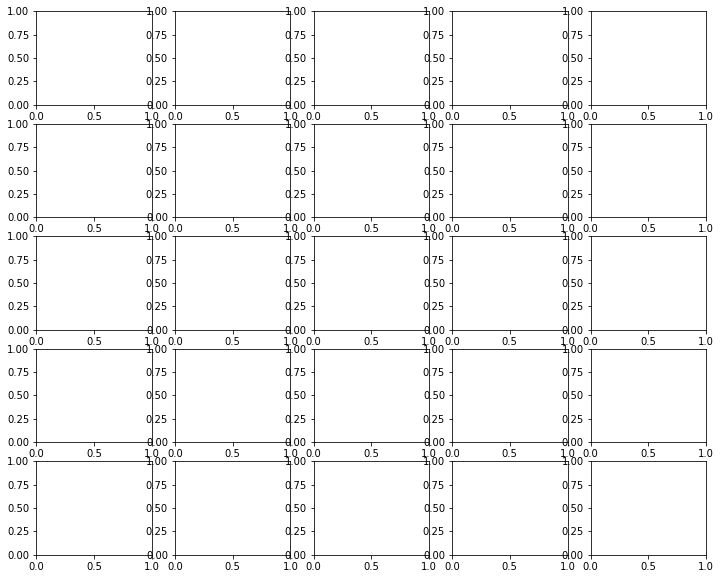

In [4]:
fig1, ax1 = plt.subplots(nrows=5, ncols=5, figsize=(12, 10));

In [5]:
for i in range(5):
		for j in range(5):
			ax1[i, j].axis('off')
			ax1[i, j].grid(False)
			ax1[i, j].set_xticks([])
			ax1[i, j].set_yticks([])

In [6]:
index = 0;
for i in range(5):
    for j in range(5):

        ax1[i, j].imshow(x_train[index], cmap='gray')
        ax1[i, j].set_title(r''.format(y_train[index]), fontsize=8)
        index += 1

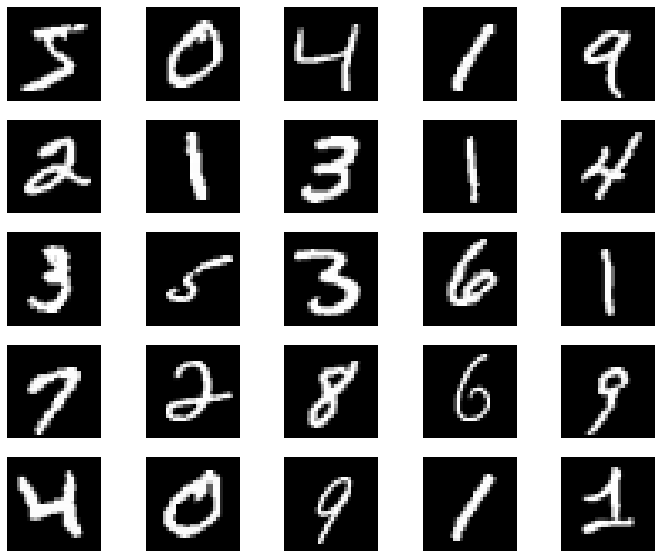

In [7]:
fig1

## Prepare the data

In [8]:
x_train, x_test = x_train/255.0, x_test / 255.0

## Build the model

In [9]:
model = tf.keras.models.Sequential()

model.add( tf.keras.layers.Flatten( input_shape=x_train[0].shape) )

model.add(  tf.keras.layers.Dense( 128, activation='tanh') )
model.add(  tf.keras.layers.Dense( 128, activation='tanh') )
model.add( tf.keras.layers.Dropout(0.1) )
model.add( tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


## Train the model

In [11]:
result = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.2610 - accuracy: 0.9233 - val_loss: 0.1476 - val_accuracy: 0.9560
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1267 - accuracy: 0.9614 - val_loss: 0.1101 - val_accuracy: 0.9658
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0882 - accuracy: 0.9731 - val_loss: 0.0919 - val_accuracy: 0.9718
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0667 - accuracy: 0.9791 - val_loss: 0.0830 - val_accuracy: 0.9737
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0524 - accuracy: 0.9832 - val_loss: 0.0804 - val_accuracy: 0.9744
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0438 - accuracy: 0.9859 - val_loss: 0.0981 - val_accuracy: 0.9706
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0349 - accuracy: 0.9887 - val_loss: 0.0785 - val_accuracy:

In [31]:
model.layers[-1].trainable

True

## Evaluate the model

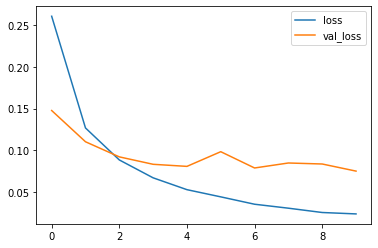

In [12]:
plt.plot(result.history['loss'], label='loss')
plt.plot(result.history['val_loss'], label='val_loss')
plt.legend()

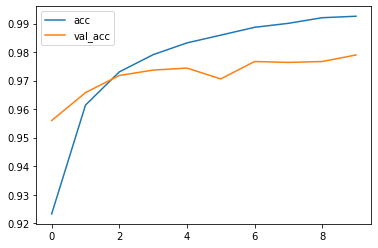

In [13]:
plt.plot(result.history['accuracy'], label='acc')
plt.plot(result.history['val_accuracy'], label='val_acc')
plt.legend()

## Make predictions

In [14]:
y_test_hat = model.predict(x_test).argmax(axis=1)

In [15]:
np.sum(y_test_hat==y_test) / y_test.shape[0]

0.979

In [16]:
cm = confusion_matrix(y_test, y_test_hat)

In [17]:
cm

array([[ 971,    0,    1,    0,    0,    1,    4,    1,    2,    0],
       [   0, 1120,    1,    4,    0,    0,    2,    3,    5,    0],
       [   3,    0, 1010,    3,    1,    0,    2,    4,    9,    0],
       [   0,    0,    3,  991,    0,    5,    0,    3,    0,    8],
       [   1,    0,    2,    2,  961,    0,    6,    1,    1,    8],
       [   2,    0,    1,   10,    2,  865,    4,    3,    3,    2],
       [   4,    1,    0,    1,    3,    3,  945,    0,    1,    0],
       [   0,    1,   11,    3,    2,    0,    0, 1005,    0,    6],
       [   0,    1,    5,    7,    3,    4,    0,    4,  947,    3],
       [   1,    2,    0,    5,   10,    3,    1,   11,    1,  975]])

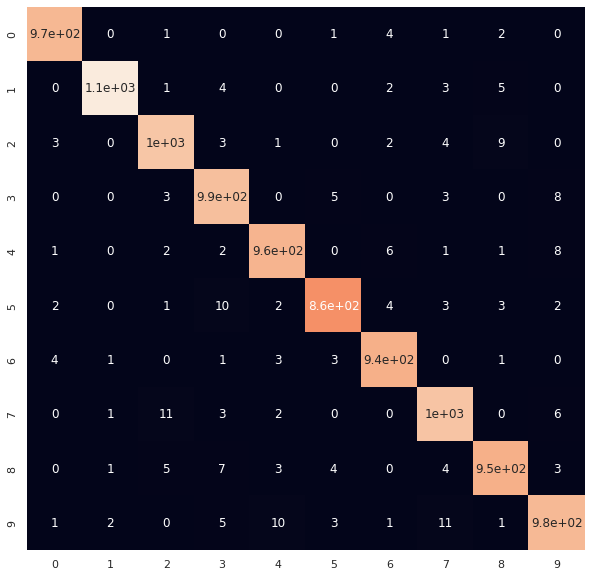

In [18]:
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(cm,annot=True,cbar=False)